# ***Import Library* yang akan digunakan**

Kode di bawah terdiri dari serangkaian pernyataan import yang membawa library dan modul spesifik untuk manipulasi data, visualisasi, dan machine learning. Dokumentasi :

- import pandas as pd = Manipulasi dan analisis data dengan DataFrame dan Series, alias pd

- import numpy as np = Operasi numerik pada array dan matriks, alias np

- import seaborn as sns = Visualisasi data statistik seperti heatmap dan pairplot, alias sns

- import matplotlib.pyplot as plt = Visualisasi dasar seperti grafik dan plot, alias plt

- from sklearn.model_selection import train_test_split = Membagi dataset menjadi data latih dan uji

- from sklearn.metrics import accuracy_score = Mengukur akurasi model klasifikasi

- from sklearn.metrics import f1_score = Menghitung F1-score untuk evaluasi model

- from sklearn.metrics import recall_score = Mengukur recall untuk evaluasi model

- from sklearn.metrics import classification_report = Menghasilkan laporan metrik seperti precision, recall, dan F1-score

- from sklearn.metrics import confusion_matrix = Membuat matriks konfusi untuk evaluasi prediksi

- from sklearn.ensemble import RandomForestClassifier = Model klasifikasi berbasis pohon keputusan (ensemble)

- from imblearn.over_sampling import SMOTE = Oversampling untuk data tidak seimbang

- from xgboost import XGBClassifier = Model klasifikasi berbasis gradient boosting

- from sklearn.preprocessing import LabelEncoder = Mengubah data kategorikal menjadi numerik

- from sklearn.metrics import ConfusionMatrixDisplay = Visualisasi confusion matrix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Upload Dataset melalui Kaggle**

Kode pada bagian ini adalah serangkaian perintah yang digunakan di lingkungan Google Colab untuk mengunggah file kredensial Kaggle, mengunduh dataset dari Kaggle, mengekstrak file dataset, dan memuat serta menampilkan informasi dasar tentang dataset tersebut.

- from google.colab import files = Mengimpor modul files dari Google Colab untuk mengunggah file dari perangkat lokal

- files.upload() = Membuka dialog untuk mengunggah file, seperti kaggle.json untuk autentikasi Kaggle

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadzulzhafran","key":"5686cda5cf3ae2a4d173988f5d2bc804"}'}

- mkdir -p ~/.kaggle = Membuat direktori .kaggle di sistem jika belum ada

- !cp kaggle.json ~/.kaggle/ = Menyalin file kaggle.json ke direktori .kaggle untuk autentikasi

- !chmod 600 ~/.kaggle/kaggle.json = Mengatur izin file kaggle.json agar hanya dapat diakses pemilik untuk keamanan

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

- !kaggle datasets download -d senadu34/air-quality-index-in-jakarta-2010-2021 = Mengunduh dataset Air Quality Index Jakarta 2010-2021 dari Kaggle

In [4]:
!kaggle datasets download -d senadu34/air-quality-index-in-jakarta-2010-2021

Dataset URL: https://www.kaggle.com/datasets/senadu34/air-quality-index-in-jakarta-2010-2021
License(s): DbCL-1.0
  0% 0.00/357k [00:00<?, ?B/s]
100% 357k/357k [00:00<00:00, 691MB/s]


- !unzip -q air-quality-index-in-jakarta-2010-2021.zip -d aqindex = Mengekstrak file zip dataset ke direktori aqindex secara senyap

In [5]:
!unzip -q air-quality-index-in-jakarta-2010-2021.zip -d aqindex

- df = pd.read_csv('/content/aqindex/ispu_dki_all.csv') = Memuat file CSV dari dataset ke dalam DataFrame Pandas bernama df

In [6]:
df = pd.read_csv('/content/aqindex/ispu_dki_all.csv')

- df.info() = Menampilkan informasi struktur DataFrame seperti jumlah baris, kolom, tipe data, dan nilai yang hilang

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5538 entries, 0 to 5537
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   5538 non-null   object 
 1   stasiun   5537 non-null   object 
 2   pm25      1516 non-null   float64
 3   pm10      5223 non-null   float64
 4   so2       5408 non-null   float64
 5   co        5450 non-null   float64
 6   o3        5434 non-null   float64
 7   no2       5432 non-null   float64
 8   max       5537 non-null   float64
 9   critical  5534 non-null   object 
 10  categori  5538 non-null   object 
dtypes: float64(7), object(4)
memory usage: 476.1+ KB


- df.describe() = Menampilkan statistik deskriptif (rata-rata, minimum, maksimum, dll.) untuk kolom numerik dalam DataFrame

In [8]:
df.describe()

,pm25,pm10,so2,co,o3,no2,max
count,1516.000000,5223.000000,5408.000000,5450.000000,5434.000000,5432.000000,5537.000000
mean,89.742084,56.407046,22.436206,20.422752,77.465771,14.349227,97.625790
std,26.615960,20.010963,15.450584,11.966246,51.798101,10.051099,40.955382
min,10.000000,2.000000,0.000000,0.000000,4.000000,1.000000,0.000000
25%,71.000000,45.000000,10.000000,12.000000,36.000000,8.000000,70.000000
50%,90.000000,57.000000,18.000000,18.000000,69.000000,12.000000,90.000000
75%,107.000000,67.000000,32.000000,26.000000,103.000000,18.000000,114.000000
max,287.000000,187.000000,112.000000,119.000000,314.000000,202.000000,314.000000


# **Exploratory Data Analysis**

Pada bagian ini akan dilakukan proses analisa data melalui visualisasi. Kode di bagian ini memproses dan memvisualisasikan data kualitas udara dari DataFrame df. Pertama, df['tanggal'] = pd.to_datetime(df['tanggal']) mengubah kolom tanggal menjadi format datetime untuk analisis waktu. Lalu, sns.countplot membuat diagram batang distribusi kategori kualitas udara dengan palet 'viridis', judul, label sumbu, rotasi teks, dan grid. Dua daftar polutan dibuat: pollutants_ugm3 (pm25, pm10) untuk satuan µg/m³ dan pollutants_ppm (so2, co, o3, no2) untuk satuan ppm. Histogram untuk setiap polutan dibuat menggunakan sns.histplot dengan kurva KDE, 30 bin, grid, dan warna berbeda (default untuk µg/m³, oranye untuk ppm). Diagram batang frekuensi polutan kritis dibuat dengan sns.countplot, diurutkan berdasarkan jumlah kemunculan. Terakhir, sns.heatmap menghasilkan heatmap korelasi antar polutan dengan anotasi, palet 'coolwarm', dan format dua desimal. Kode ini menganalisis distribusi dan hubungan polutan dalam dataset kualitas udara.

- df['tanggal'] = pd.to_datetime(df['tanggal']) = Mengubah kolom tanggal menjadi format datetime

In [9]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

- plt.figure(figsize=(10, 6)) = Membuat kanvas figure berukuran 10x6 inci

- sns.countplot(x='categori', data=df, palette='viridis') = Membuat diagram batang distribusi kategori kualitas udara

- plt.title('Distribusi Kategori Kualitas Udara') = Menambahkan judul diagram batang

- plt.xlabel('Kategori Kualitas Udara') = Menambahkan label sumbu x

- plt.xticks(rotation=45) = Memutar label sumbu x 45 derajat

- plt.grid(axis='y', linestyle='--', alpha=0.5) = Menambahkan grid pada sumbu y

- plt.show() = Menampilkan visualisasi

<ipython-input-10-ddbb13cb4429>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='categori', data=df, palette='viridis')


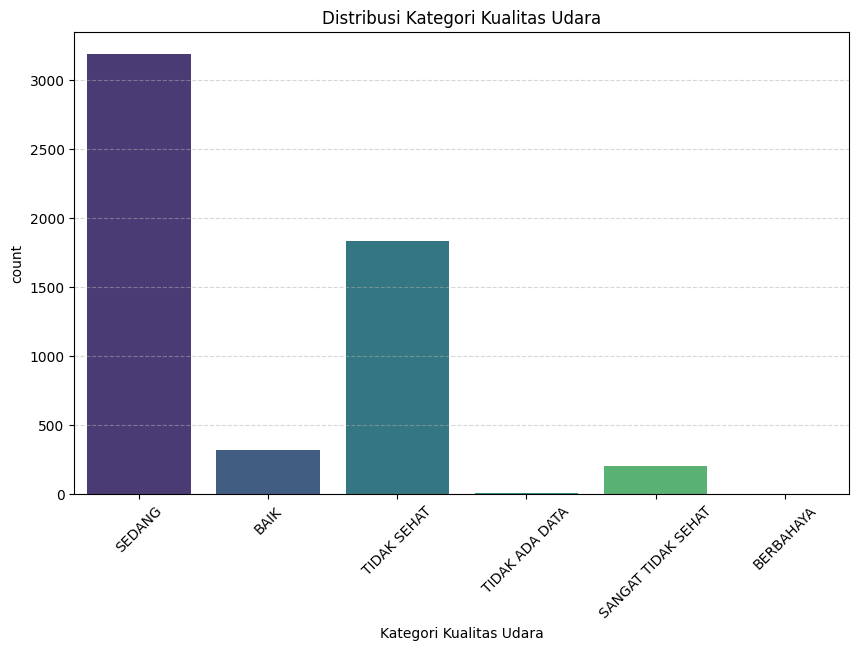

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='categori', data=df, palette='viridis')
plt.title('Distribusi Kategori Kualitas Udara')
plt.xlabel('Kategori Kualitas Udara')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


- pollutants_ugm3 = ['pm25', 'pm10'] = Mendefinisikan daftar polutan satuan µg/m³

- pollutants_ppm = ['so2', 'co', 'o3', 'no2'] = Mendefinisikan daftar polutan satuan ppm

- for col in pollutants_ugm3 = Iterasi untuk polutan µg/m³

- plt.figure(figsize=(8, 4)) = Membuat kanvas figure 8x4 inci untuk histogram

- sns.histplot(df[col], kde=True, bins=30) = Membuat histogram polutan µg/m³ dengan KDE dan 30 bin

- plt.title(f'Distribusi {col.upper()} (µg/m³)') = Menambahkan judul dengan nama polutan

- plt.xlabel(f'{col.upper()} (µg/m³)') = Menambahkan label sumbu x dengan satuan µg/m³

- plt.ylabel('Frekuensi') = Menambahkan label sumbu y

- plt.grid(True) = Menambahkan grid

- plt.show() = Menampilkan histogram µg/m³

- for col in pollutants_ppm = Iterasi untuk polutan ppm

- sns.histplot(df[col], kde=True, bins=30, color='orange') = Membuat histogram polutan ppm dengan KDE, 30 bin, warna oranye

- plt.title(f'Distribusi {col.upper()} (ppm)') = Menambahkan judul dengan nama polutan dan satuan ppm

- plt.xlabel(f'{col.upper()} (ppm)') = Menambahkan label sumbu x dengan satuan ppm

- plt.ylabel('Frekuensi') = Menambahkan label sumbu y

- plt.grid(True) = Menambahkan grid

- plt.show() = Menampilkan histogram ppm

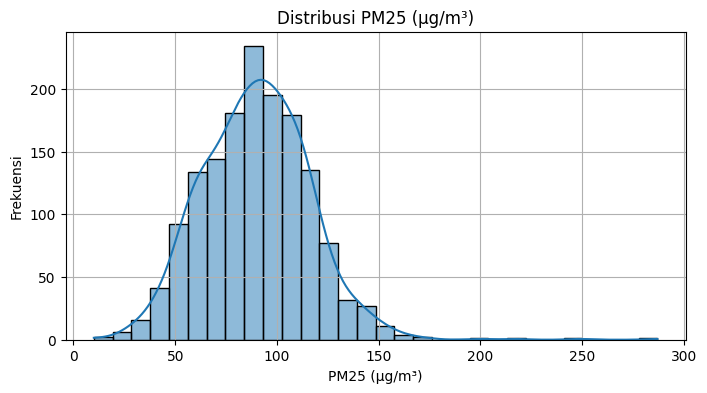

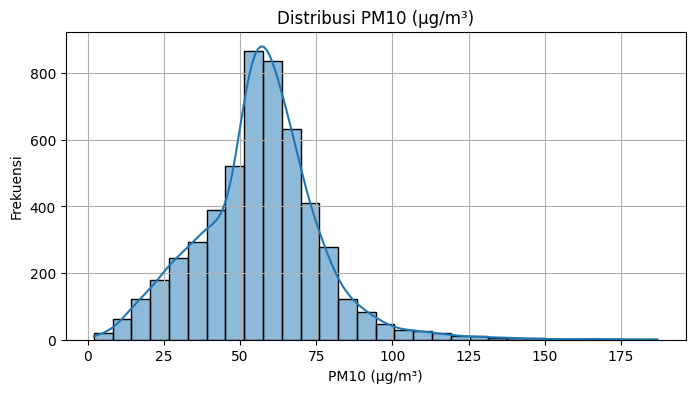

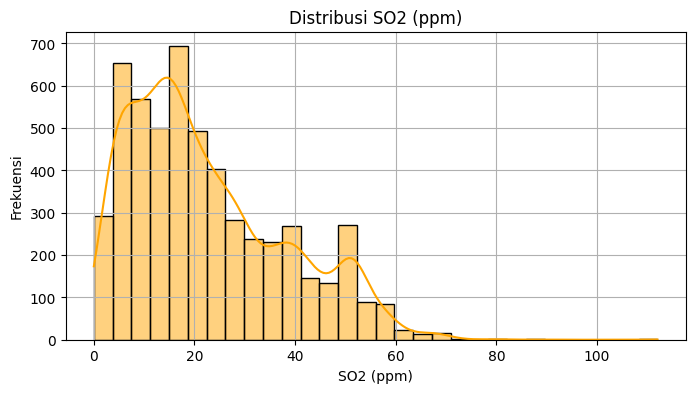

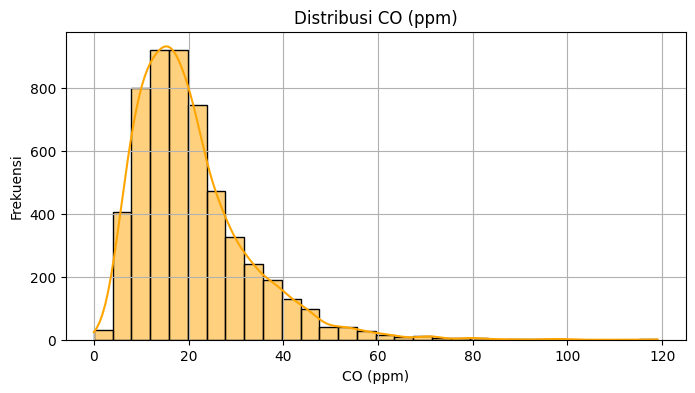

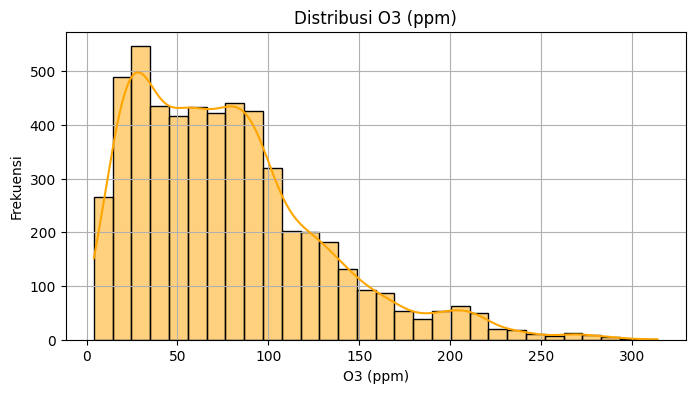

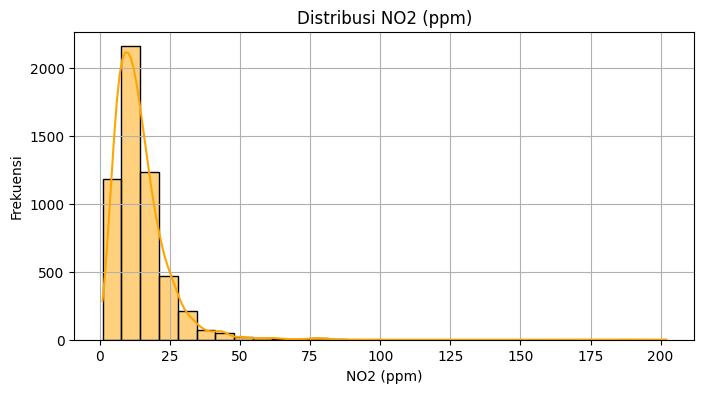

In [11]:
pollutants_ugm3 = ['pm25', 'pm10']

pollutants_ppm = ['so2', 'co', 'o3', 'no2']

# Plot histogram µg/m³
for col in pollutants_ugm3:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col.upper()} (µg/m³)')
    plt.xlabel(f'{col.upper()} (µg/m³)')
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()

# Plot histogram untuk ppm
for col in pollutants_ppm:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f'Distribusi {col.upper()} (ppm)')
    plt.xlabel(f'{col.upper()} (ppm)')
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()


- plt.figure(figsize=(6, 4)) = Membuat kanvas figure 6x4 inci untuk diagram batang

- sns.countplot(data=df, x='critical', order=df['critical'].value_counts().index) = Membuat diagram batang frekuensi polutan kritis, diurutkan

- plt.title('Frekuensi Polutan Kritis') = Menambahkan judul diagram batang

- plt.ylabel('Jumlah Hari') = Menambahkan label sumbu y

- plt.grid(True) = Menambahkan grid

- plt.show() = Menampilkan diagram batang

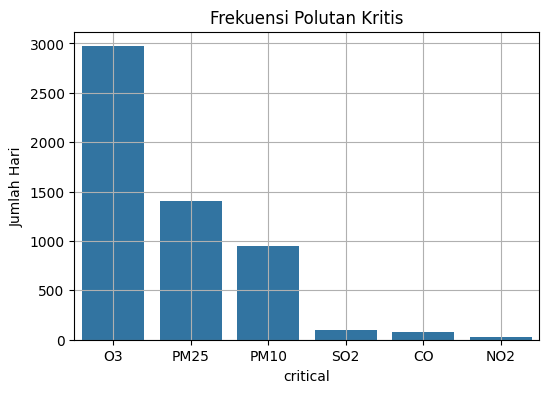

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='critical', order=df['critical'].value_counts().index)
plt.title('Frekuensi Polutan Kritis')
plt.ylabel('Jumlah Hari')
plt.grid(True)
plt.show()

- pollutants = ['pm25', 'pm10', 'so2', 'co', 'o3', 'no2'] = Mendefinisikan daftar polutan untuk korelasi

- plt.figure(figsize=(10, 6)) = Membuat kanvas figure 10x6 inci untuk heatmap

- sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm', fmt='.2f') = Membuat heatmap korelasi polutan dengan anotasi dan palet coolwarm

- plt.title('Korelasi Antar Polutan') = Menambahkan judul heatmap

- plt.show() = Menampilkan heatmap

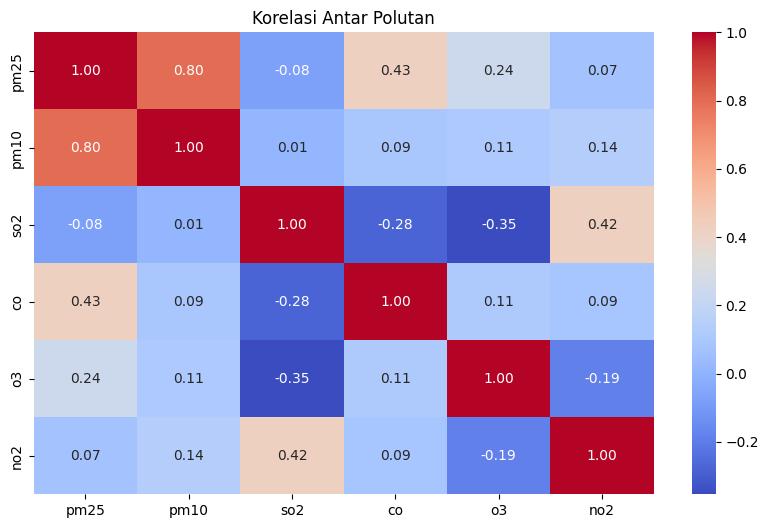

In [13]:
pollutants = ['pm25', 'pm10','so2', 'co', 'o3', 'no2']
plt.figure(figsize=(10, 6))
sns.heatmap(df[pollutants].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Polutan')
plt.show()

# ***Data Cleaning***

Pada bagian ini dilakukan processing DataFrame df untuk analisis data kualitas udara. Pertama, kode memilih kolom pm10, pm25, so2, co, o3, no2, dan categori untuk difokuskan. Kemudian, baris dengan kategori 'TIDAK ADA DATA' dihapus. Kode menampilkan jumlah nilai kosong per kolom, lalu menghapus kolom pm25. Setelah itu, baris dengan kategori 'BERBAHAYA' dihapus dan indeks diatur ulang. Terakhir, kode menampilkan jumlah nilai kosong lagi dan seluruh DataFrame yang telah diproses.

- df = df[["pm10","pm25", "so2", "co", "o3", "no2", "categori"]] = Memilih kolom pm10, pm25, so2, co, o3, no2, dan categori dari DataFrame

In [14]:
df = df[["pm10","pm25", "so2", "co", "o3", "no2", "categori"]]

- df = df[df['categori'] != 'TIDAK ADA DATA'] = Menghapus baris dengan kategori 'TIDAK ADA DATA'

In [15]:
df = df[df['categori'] != 'TIDAK ADA DATA']

- print(df.isnull().sum()) = Menampilkan jumlah nilai kosong per kolom

In [16]:
print(df.isnull().sum())

pm10         311
pm25        4018
so2          126
co            84
o3           100
no2          102
categori       0
dtype: int64


- df = df.drop(columns=['pm25']) = Menghapus kolom pm25 dari DataFrame
- print(df.columns) = Menampilkan daftar nama kolom DataFrame

In [17]:
df = df.drop(columns=['pm25'])
print(df.columns)

Index(['pm10', 'so2', 'co', 'o3', 'no2', 'categori'], dtype='object')


- df = df[df['categori'] != 'BERBAHAYA'].reset_index(drop=True) = Menghapus baris dengan kategori 'BERBAHAYA' dan mengatur ulang indeks

In [18]:
df = df[df['categori'] != 'BERBAHAYA'].reset_index(drop=True)

- df['pm10'] = df['pm10'].fillna(df['pm10'].mean()) = Mengisi nilai kosong pada kolom pm10 dengan rata-rata nilai pm10

- df['so2'] = df['so2'].fillna(df['so2'].mean()) = Mengisi nilai kosong pada kolom so2 dengan rata-rata nilai so2

- df['co'] = df['co'].fillna(df['co'].mean()) = Mengisi nilai kosong pada kolom co dengan rata-rata nilai co

- df['o3'] = df['o3'].fillna(df['o3'].mean()) = Mengisi nilai kosong pada kolom o3 dengan rata-rata nilai o3

- df['no2'] = df['no2'].fillna(df['no2'].mean()) = Mengisi nilai kosong pada kolom no2 dengan rata-rata nilai no2

In [19]:
df['pm10'] = df['pm10'].fillna(df['pm10'].mean())
df['so2'] = df['so2'].fillna(df['so2'].mean())
df['co'] = df['co'].fillna(df['co'].mean())
df['o3'] = df['o3'].fillna(df['o3'].mean())
df['no2'] = df['no2'].fillna(df['no2'].mean())

- print(df.isnull().sum()) = Menampilkan jumlah nilai kosong per kolom setelah pemrosesan

In [20]:
print(df.isnull().sum())

pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64


- jumlah_duplikat = df.duplicated().sum() = Menghitung jumlah baris duplikat dalam DataFrame

- print(f"Jumlah data duplikat: {jumlah_duplikat}") = Menampilkan jumlah baris duplikat

In [21]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 2


- df = df.drop_duplicates() = Menghapus baris duplikat dari DataFrame

In [22]:
df = df.drop_duplicates()

- jumlah_duplikat = df.duplicated().sum() = Memeriksa ulang jumlah baris duplikat setelah penghapusan
- print(f"Jumlah data duplikat: {jumlah_duplikat}") = Menampilkan jumlah baris duplikat setelah penghapusan

In [23]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


- kolom_kontrol = ['pm10', 'so2', 'co', 'o3', 'no2'] = Mendefinisikan daftar kolom polutan untuk analisis outlier

- jumlah_total_outlier = 0 = Menginisialisasi variabel untuk menyimpan total jumlah outlier

- for kolom in kolom_kontrol = Melakukan iterasi untuk setiap kolom polutan

- Q1 = df[kolom].quantile(0.25) = Menghitung kuartil pertama (Q1) untuk kolom

- Q3 = df[kolom].quantile(0.75) = Menghitung kuartil ketiga (Q3) untuk kolom

- IQR = Q3 - Q1 = Menghitung Interquartile Range (IQR)

- batas_bawah = Q1 - 1.5 * IQR = Menghitung batas bawah untuk mendeteksi outlier

- batas_atas = Q3 + 1.5 * IQR = Menghitung batas atas untuk mendeteksi outlier

- outlier = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)] = Mengidentifikasi baris dengan nilai outlier

- jumlah = outlier.shape[0] = Menghitung jumlah baris outlier untuk kolom

- print(f"Jumlah outlier di kolom '{kolom}': {jumlah}") = Menampilkan jumlah outlier per kolom

- jumlah_total_outlier += jumlah = Menambahkan jumlah outlier kolom ke total

- print(f"\nTotal semua outlier: {jumlah_total_outlier}") = Menampilkan total jumlah outlier semua kolom

In [24]:
kolom_kontrol = ['pm10', 'so2', 'co', 'o3', 'no2']
jumlah_total_outlier = 0

for kolom in kolom_kontrol:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    outlier = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]
    jumlah = outlier.shape[0]
    print(f"Jumlah outlier di kolom '{kolom}': {jumlah}")
    jumlah_total_outlier += jumlah

print(f"\nTotal semua outlier: {jumlah_total_outlier}")

Jumlah outlier di kolom 'pm10': 242
Jumlah outlier di kolom 'so2': 46
Jumlah outlier di kolom 'co': 240
Jumlah outlier di kolom 'o3': 188
Jumlah outlier di kolom 'no2': 198

Total semua outlier: 914


- plt.figure(figsize=(12, 6)) = Membuat kanvas figure berukuran 12x6 inci untuk boxplot

- sns.boxplot(data=df[kolom_kontrol]) = Membuat boxplot untuk visualisasi distribusi dan outlier kolom polutan

- plt.title('Visualisasi Outlier dengan Boxplot') = Menambahkan judul boxplot

- plt.xlabel('Parameter Kualitas Udara') = Menambahkan label sumbu x

- plt.ylabel('Nilai') = Menambahkan label sumbu y

- plt.show() = Menampilkan boxplot

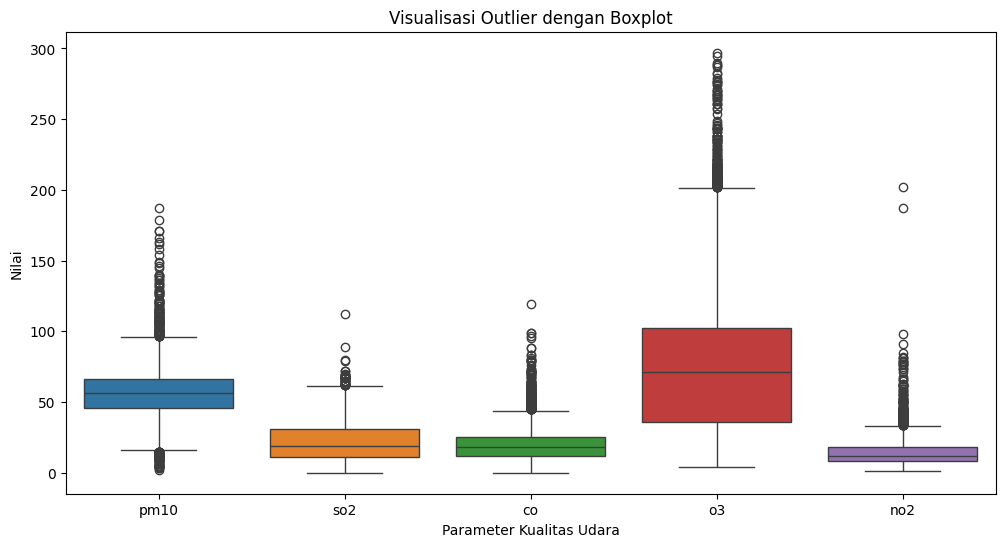

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kolom_kontrol])
plt.title('Visualisasi Outlier dengan Boxplot')
plt.xlabel('Parameter Kualitas Udara')
plt.ylabel('Nilai')
plt.show()

- print(df) = Menampilkan seluruh DataFrame yang telah diproses

In [26]:
print(df)

      pm10   so2    co    o3   no2     categori
0     60.0   4.0  73.0  27.0  14.0       SEDANG
1     32.0   2.0  16.0  33.0   9.0         BAIK
2     27.0   2.0  19.0  20.0   9.0         BAIK
3     22.0   2.0  16.0  15.0   6.0         BAIK
4     25.0   2.0  17.0  15.0   8.0         BAIK
...    ...   ...   ...   ...   ...          ...
5528  45.0  52.0  18.0  19.0  40.0       SEDANG
5529  18.0  28.0  13.0  25.0   4.0       SEDANG
5530  46.0  57.0  11.0  11.0  51.0       SEDANG
5531  29.0  24.0  21.0  34.0   8.0  TIDAK SEHAT
5532  20.0  24.0   9.0  31.0   6.0       SEDANG

[5531 rows x 6 columns]


# ***Data Split***

Pada bagian ini akan disiapkan data untuk melakukan modeling dengan memisahkan fitur dan label dari DataFrame df, mengubah label kategori menjadi numerik, membagi data menjadi set latih dan uji, serta menangani ketidakseimbangan data. Pertama, kolom categori dipisahkan sebagai label (y), sedangkan kolom lain menjadi fitur (X). Label dienkode menjadi numerik menggunakan LabelEncoder. Data kemudian dibagi menjadi set latih (80%) dan uji (20%) dengan train_test_split. Ukuran masing-masing set ditampilkan. Terakhir, SMOTE digunakan untuk menyeimbangkan data latih dengan oversampling, dan ukuran serta distribusi label data latih yang telah diseimbangkan ditampilkan.

- X = df.drop('categori', axis=1) = Memisahkan fitur dengan menghapus kolom categori dari DataFrame

- y = df['categori'] = Menetapkan kolom categori sebagai label

- le = LabelEncoder() = Membuat objek LabelEncoder untuk mengubah label kategorikal menjadi numerik

- y_encoded = le.fit_transform(df['categori']) = Mengubah label categori menjadi nilai numerik

In [27]:
X = df.drop('categori', axis=1)
y = df['categori']

le = LabelEncoder()
y_encoded = le.fit_transform(df['categori'])

- X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42) = Membagi data menjadi set latih (80%) dan uji (20%) dengan seed acak 42

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

- print("Ukuran X_train:", X_train.shape) = Menampilkan dimensi set fitur latih

- print("Ukuran X_test:", X_test.shape) = Menampilkan dimensi set fitur uji

- print("Ukuran y_train:", y_train.shape) = Menampilkan dimensi set label latih

- print("Ukuran y_test:", y_test.shape) = Menampilkan dimensi set label uji

In [29]:
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (4424, 5)
Ukuran X_test: (1107, 5)
Ukuran y_train: (4424,)
Ukuran y_test: (1107,)


- smote = SMOTE(random_state=42) = Membuat objek SMOTE untuk menyeimbangkan data dengan seed acak 42

- X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) = Menerapkan SMOTE untuk oversampling data latih

- print("Setelah SMOTE:") = Menampilkan teks untuk menandai hasil SMOTE

- print("Ukuran X_train_resampled:", X_train_resampled.shape) = Menampilkan dimensi set fitur latih setelah SMOTE

- print("Distribusi label y_train_resampled:\n", pd.Series(y_train_resampled).value_counts()) = Menampilkan distribusi label setelah SMOTE

In [30]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Setelah SMOTE:")
print("Ukuran X_train_resampled:", X_train_resampled.shape)
print("Distribusi label y_train_resampled:\n", pd.Series(y_train_resampled).value_counts())

Setelah SMOTE:
Ukuran X_train_resampled: (10104, 5)
Distribusi label y_train_resampled:
 3    2526
2    2526
1    2526
0    2526
Name: count, dtype: int64


# **Modeling dengan Random Forest**

Kode bagian ini akan melatih model Random Forest untuk klasifikasi data kualitas udara, mengevaluasi performanya, dan memvisualisasikan hasilnya. Model RandomForestClassifier dikonfigurasi dengan 600 pohon, kedalaman maksimum 15, kriteria 'gini', dan fitur acak 'sqrt', lalu dilatih dengan data latih yang telah diseimbangkan (X_train_resampled, y_train_resampled). Prediksi dilakukan pada data uji (X_test), dan performa dievaluasi menggunakan metrik akurasi, F1-score, dan recall. Laporan klasifikasi ditampilkan untuk detail performa per kelas. Terakhir, matriks konfusi divisualisasikan sebagai heatmap dengan sns.heatmap menggunakan palet 'rocket_r', label asli dari LabelEncoder, dan format annotasi numerik untuk membandingkan prediksi dan nilai aktual.

- model = RandomForestClassifier(n_estimators=600, max_depth=15, criterion='gini', max_features='sqrt', random_state=42, n_jobs=-1) = Membuat model Random Forest dengan 600 pohon, kedalaman 15, kriteria gini, fitur acak sqrt, seed 42, dan paralelisme maksimum

- model.fit(X_train_resampled, y_train_resampled) = Melatih model dengan data latih yang telah diseimbangkan

In [31]:
model = RandomForestClassifier(
    n_estimators=600,
    max_depth=15,
    criterion='gini',
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=15, n_estimators=600, n_jobs=-1,
                       random_state=42)

## **Evaluasi**

- y_pred = model.predict(X_test) = Memprediksi label pada data uji

- accuracy = accuracy_score(y_test, y_pred) = Menghitung akurasi model

- f1 = f1_score(y_test, y_pred, average='weighted') = Menghitung F1-score rata-rata tertimbang

- recall = recall_score(y_test, y_pred, average='weighted') = Menghitung recall rata-rata tertimbang

- print("Random Forest - Accuracy:", accuracy) = Menampilkan nilai akurasi model

- print("Random Forest - F1 Score:", f1) = Menampilkan nilai F1-score model

- print("Random Forest - Recall:", recall) = Menampilkan nilai recall model

- print(classification_report(y_test, y_pred)) = Menampilkan laporan klasifikasi dengan metrik per kelas

- conf_matrix = confusion_matrix(y_test, y_pred) = Membuat confusion matrix dari prediksi dan label aktual

- labels = le.classes_ = Mengambil nama kelas asli dari LabelEncoder

- plt.figure(figsize=(8, 6)) = Membuat kanvas figure berukuran 8x6 inci untuk heatmap

- sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r', xticklabels=labels, yticklabels=labels) = Membuat confusion matrix dengan anotasi numerik, palet rocket_r, dan label kelas

- plt.xlabel('Prediksi') = Menambahkan label sumbu x sebagai 'Prediksi'

- plt.ylabel('Aktual') = Menambahkan label sumbu y sebagai 'Aktual'

- plt.title('Confusion Matrix Random Forest') = Menambahkan judul confusion matrix

- plt.xticks(rotation=45) = Memutar label sumbu x sebesar 45 derajat

- plt.yticks(rotation=45) = Memutar label sumbu y sebesar 45 derajat

- plt.tight_layout() = Mengatur tata letak agar rapi

- plt.show() = Menampilkan heatmap confusion matrix

Random Forest - Accuracy: 0.940379403794038
Random Forest - F1 Score: 0.9406569021564185
Random Forest - Recall: 0.940379403794038
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        65
           1       1.00      1.00      1.00        40
           2       0.96      0.93      0.95       659
           3       0.91      0.95      0.93       343

    accuracy                           0.94      1107
   macro avg       0.93      0.95      0.94      1107
weighted avg       0.94      0.94      0.94      1107



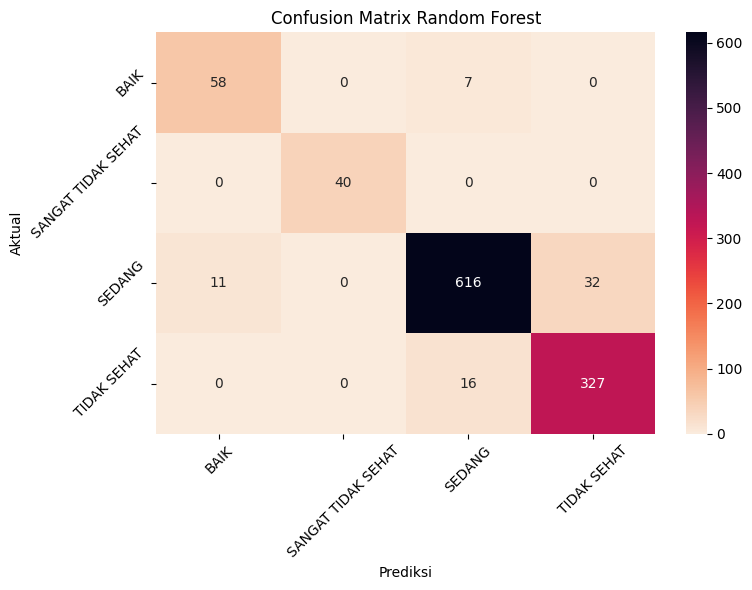

In [32]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Random Forest - Accuracy:", accuracy)
print("Random Forest - F1 Score:", f1)
print("Random Forest - Recall:", recall)

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
labels = le.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


# **Modeling dengan XGBoost**

Kode pada bagian ini melatih model XGBoost untuk klasifikasi data kualitas udara, mengevaluasi performanya, dan memvisualisasikan hasilnya. Model XGBClassifier dikonfigurasi dengan 600 pohon, kedalaman maksimum 15, learning rate 0.1, subsampling 80%, dan fitur acak 80%, lalu dilatih dengan data latih yang telah diseimbangkan. Prediksi dilakukan pada data uji, diikuti evaluasi menggunakan akurasi, F1-score, dan recall. Laporan klasifikasi ditampilkan untuk detail performa per kelas. Terakhir, confusion matrix divisualisasikan dengan palet 'rocket_r' dan label dari LabelEncoder untuk membandingkan prediksi dan nilai aktual.

- model2 = XGBClassifier(n_estimators=600, max_depth=15, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='mlogloss', random_state=42) = Membuat model XGBoost dengan 600 pohon, kedalaman 15, learning rate 0.1, subsampling 80%, fitur acak 80%, tanpa label encoder bawaan, metrik evaluasi mlogloss, dan seed 42

- model2.fit(X_train_resampled, y_train_resampled) = Melatih model XGBoost dengan data latih yang telah diseimbangkan

In [33]:
model2 = XGBClassifier(
    n_estimators=600,
    max_depth=15,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

model2.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:26:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

## **Evaluasi**

- y_pred2 = model2.predict(X_test) = Memprediksi label pada data uji

- accuracy = accuracy_score(y_test, y_pred2) = Menghitung akurasi model

- f1 = f1_score(y_test, y_pred2, average='weighted') = Menghitung F1-score rata-rata tertimbang

- recall = recall_score(y_test, y_pred2, average='weighted') = Menghitung recall rata-rata tertimbang

- print("XGBoost - Accuracy:", accuracy) = Menampilkan nilai akurasi model

- print("XGBoost - F1 Score:", f1) = Menampilkan nilai F1-score model

- print("XGBoost - Recall:", recall) = Menampilkan nilai recall model

- print("\nClassification Report XGBoost:\n", classification_report(y_test, y_pred2)) = Menampilkan laporan klasifikasi dengan metrik per kelas

- conf_matrix = confusion_matrix(y_test, y_pred2) = Membuat confusion matrix dari prediksi dan label aktual

- plt.figure(figsize=(8, 6)) = Membuat kanvas figure berukuran 8x6 inci untuk heatmap

- sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r', xticklabels=labels, yticklabels=labels) = Membuat confusion matrix dengan anotasi numerik, palet rocket_r, dan label kelas

- plt.xlabel('Prediksi') = Menambahkan label sumbu x sebagai 'Prediksi'

- plt.ylabel('Aktual') = Menambahkan label sumbu y sebagai 'Aktual'

- plt.title('Confusion Matrix XGBoost') = Menambahkan judul confusion matrix

- plt.xticks(rotation=45) = Memutar label sumbu x sebesar 45 derajat

- plt.yticks(rotation=45) = Memutar label sumbu y sebesar 45 derajat

- plt.tight_layout() = Mengatur tata letak agar rapi

- plt.show() = Menampilkan confusion matrix

XGBoost - Accuracy: 0.9277326106594399
XGBoost - F1 Score: 0.9279306634983239
XGBoost - Recall: 0.9277326106594399

Classification Report XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        65
           1       0.98      1.00      0.99        40
           2       0.95      0.93      0.94       659
           3       0.91      0.92      0.91       343

    accuracy                           0.93      1107
   macro avg       0.91      0.94      0.92      1107
weighted avg       0.93      0.93      0.93      1107



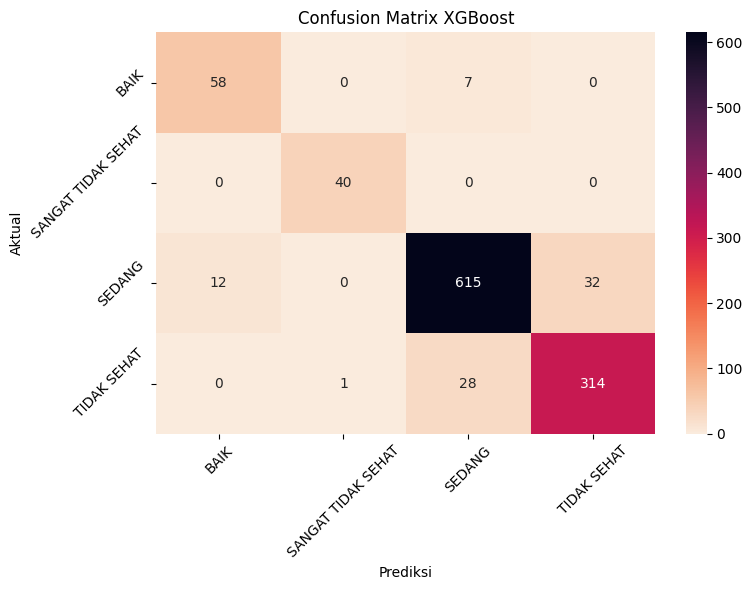

In [34]:
y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')

print("XGBoost - Accuracy:", accuracy)
print("XGBoost - F1 Score:", f1)
print("XGBoost - Recall:", recall)

print("\nClassification Report XGBoost:\n", classification_report(y_test, y_pred2))

conf_matrix = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix XGBoost')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## Inferensi

Kode pada bagian ini akan menggunakan model Random Forestd dan XGBoost yang telah dilatih untuk memprediksi kategori kualitas udara dari data baru. Modul pandas diimport untuk membuat DataFrame. Daftar feature_names mendefinisikan nama kolom fitur (pm10, so2, co, o3, no2). Data uji baru (test_samples) berisi empat sampel dengan nilai fitur berbeda, yang diubah menjadi DataFrame x_test_new. Model memprediksi kategori dalam bentuk angka (prediksi_angka), lalu diubah kembali ke kategori asli menggunakan le.inverse_transform. Hasil prediksi untuk setiap sampel ditampilkan bersama data uji dalam format dictionary dan kategori kualitas udara.

- feature_names = ['pm10', 'so2', 'co', 'o3', 'no2'] = Mendefinisikan daftar nama kolom fitur untuk data uji

- test_samples = [[10, 5, 3, 7, 8], [40, 20, 15, 25, 30], [80, 35, 50, 60, 55], [120, 50, 80, 90, 85]] = Mendefinisikan data uji baru dengan empat sampel fitur

- x_test_new = pd.DataFrame(test_samples, columns=feature_names) = Membuat DataFrame dari data uji dengan nama kolom sesuai feature_names

- prediksi_angka = model.predict(x_test_new) = Memprediksi kategori kualitas udara dalam bentuk angka menggunakan model Random Forest

- prediksi_kategori = le.inverse_transform(prediksi_angka) = Mengubah prediksi angka kembali ke kategori asli menggunakan LabelEncoder

- for i, kategori in enumerate(prediksi_kategori) = Iterasi untuk setiap prediksi kategori dengan indeks i

- print(f"Data uji ke-{i+1}: {x_test_new.iloc[i].to_dict()}") = Menampilkan data uji ke-i dalam format dictionary

- print(f"Prediksi Kategori Kualitas Udara: {kategori}\n") = Menampilkan kategori kualitas udara hasil prediksi untuk data uji ke-i

In [40]:
feature_names = ['pm10', 'so2', 'co', 'o3', 'no2']

# uji data baru
test_samples = [
    [10, 5, 3, 7, 8],        # Udara sangat bersih
    [40, 20, 20, 30, 35],   # Udara sedang tercemar ringan
    [80, 35, 50, 60, 55],   # Udara tidak sehat
    [120, 50, 80, 90, 85],  # Udara sangat tidak sehat
]

x_test_new = pd.DataFrame(test_samples, columns=feature_names)

prediksi_angka = model.predict(x_test_new)
prediksi_kategori = le.inverse_transform(prediksi_angka)

for i, kategori in enumerate(prediksi_kategori):
    print(f"Data uji ke-{i+1}: {x_test_new.iloc[i].to_dict()}")
    print(f"Prediksi Kategori Kualitas Udara: {kategori}\n")


Data uji ke-1: {'pm10': 10, 'so2': 5, 'co': 3, 'o3': 7, 'no2': 8}
Prediksi Kategori Kualitas Udara: BAIK

Data uji ke-2: {'pm10': 40, 'so2': 20, 'co': 20, 'o3': 30, 'no2': 35}
Prediksi Kategori Kualitas Udara: SEDANG

Data uji ke-3: {'pm10': 80, 'so2': 35, 'co': 50, 'o3': 60, 'no2': 55}
Prediksi Kategori Kualitas Udara: TIDAK SEHAT

Data uji ke-4: {'pm10': 120, 'so2': 50, 'co': 80, 'o3': 90, 'no2': 85}
Prediksi Kategori Kualitas Udara: TIDAK SEHAT



- feature_names = ['pm10', 'so2', 'co', 'o3', 'no2'] = Mendefinisikan daftar nama kolom fitur untuk data uji

- test_samples = [[10, 5, 3, 7, 8], [40, 20, 15, 25, 30], [80, 35, 50, 60, 55], [120, 50, 80, 90, 85]] = Mendefinisikan data uji baru dengan empat sampel fitur

- x_test_new = pd.DataFrame(test_samples, columns=feature_names) = Membuat DataFrame dari data uji dengan nama kolom sesuai feature_names

- prediksi_angka = model2.predict(x_test_new) = Memprediksi kategori kualitas udara dalam bentuk angka menggunakan model XGBoost.

- prediksi_kategori = le.inverse_transform(prediksi_angka) = Mengubah prediksi angka kembali ke kategori asli menggunakan LabelEncoder

- for i, kategori in enumerate(prediksi_kategori) = Iterasi untuk setiap prediksi kategori dengan indeks i

- print(f"Data uji ke-{i+1}: {x_test_new.iloc[i].to_dict()}") = Menampilkan data uji ke-i dalam format dictionary

- print(f"Prediksi Kategori Kualitas Udara: {kategori}\n") = Menampilkan kategori kualitas udara hasil prediksi untuk data uji ke-i

In [41]:
feature_names = ['pm10', 'so2', 'co', 'o3', 'no2']

test_samples = [
    [10, 5, 3, 7, 8],        # Udara sangat bersih, rendah polutan
    [40, 20, 20, 30, 35],   # Udara sedang tercemar ringan
    [80, 35, 50, 60, 55],   # Udara tidak sehat
    [120, 50, 80, 90, 85],  # Udara sangat tidak sehat
]

x_test_new = pd.DataFrame(test_samples, columns=feature_names)

prediksi_angka = model2.predict(x_test_new)
prediksi_kategori = le.inverse_transform(prediksi_angka)

for i, kategori in enumerate(prediksi_kategori):
    print(f"Data uji ke-{i+1}: {x_test_new.iloc[i].to_dict()}")
    print(f"Prediksi Kategori Kualitas Udara: {kategori}\n")

Data uji ke-1: {'pm10': 10, 'so2': 5, 'co': 3, 'o3': 7, 'no2': 8}
Prediksi Kategori Kualitas Udara: BAIK

Data uji ke-2: {'pm10': 40, 'so2': 20, 'co': 20, 'o3': 30, 'no2': 35}
Prediksi Kategori Kualitas Udara: SEDANG

Data uji ke-3: {'pm10': 80, 'so2': 35, 'co': 50, 'o3': 60, 'no2': 55}
Prediksi Kategori Kualitas Udara: TIDAK SEHAT

Data uji ke-4: {'pm10': 120, 'so2': 50, 'co': 80, 'o3': 90, 'no2': 85}
Prediksi Kategori Kualitas Udara: TIDAK SEHAT



# ***Feature Importance***

Kode pada bagian ini membandingkan feature importance dari model Random Forest dan XGBoost menggunakan visualisasi bar horizontal. Kode mengambil nilai feature importance dari kedua model, mengurutkan fitur berdasarkan nilai pentingnya dari Random Forest, dan menyusun ulang nilai pentingnya untuk kedua model sesuai urutan tersebut. Visualisasi dibuat dengan plt.barh, menampilkan dua bar (biru untuk Random Forest, salmon untuk XGBoost) berdampingan untuk setiap fitur, dengan label, sumbu yang diatur, dan legenda untuk membandingkan kontribusi fitur pada kedua model.

- rf_importances = model.feature_importances_ = Mengambil nilai pentingnya fitur dari model Random Forest

- xgb_importances = model2.feature_importances_ = Mengambil nilai pentingnya fitur dari model XGBoost

- feature_names = X.columns = Mengambil nama kolom fitur dari DataFrame X

- sorted_indices = np.argsort(rf_importances)[::-1] = Mengurutkan indeks fitur berdasarkan pentingnya dari Random Forest secara menurun

- sorted_features = np.array(feature_names)[sorted_indices] = Mengurutkan nama fitur berdasarkan indeks yang telah diurutkan

- rf_sorted = rf_importances[sorted_indices] = Menyusun ulang nilai pentingnya Random Forest sesuai urutan indeks

- xgb_sorted = xgb_importances[sorted_indices] = Menyusun ulang nilai pentingnya XGBoost sesuai urutan indeks

- bar_width = 0.4 = Menetapkan lebar bar untuk visualisasi

- index = np.arange(len(sorted_features)) = Membuat array indeks untuk posisi bar

- plt.figure(figsize=(12, 6)) = Membuat kanvas figure berukuran 12x6 inci

- plt.barh(index, rf_sorted, bar_width, label='Random Forest', color='skyblue') = Membuat bar horizontal untuk pentingnya fitur Random Forest dengan warna skyblue

- plt.barh(index + bar_width, xgb_sorted, bar_width, label='XGBoost', color='salmon') = Membuat bar horizontal untuk pentingnya fitur XGBoost dengan warna salmon

- plt.yticks(index + bar_width / 2, sorted_features) = Mengatur label sumbu y dengan nama fitur di tengah bar

- plt.xlabel("Feature Importance Score") = Menambahkan label sumbu x sebagai skor pentingnya fitur

- plt.title("Perbandingan Feature Importance: Random Forest vs XGBoost") = Menambahkan judul visualisasi

- plt.gca().invert_yaxis() = Membalikkan sumbu y agar fitur terpenting di atas

- plt.legend() = Menambahkan legenda untuk membedakan model

- plt.tight_layout() = Mengatur tata letak agar rapi

- plt.show() = Menampilkan visualisasi bar horizontal

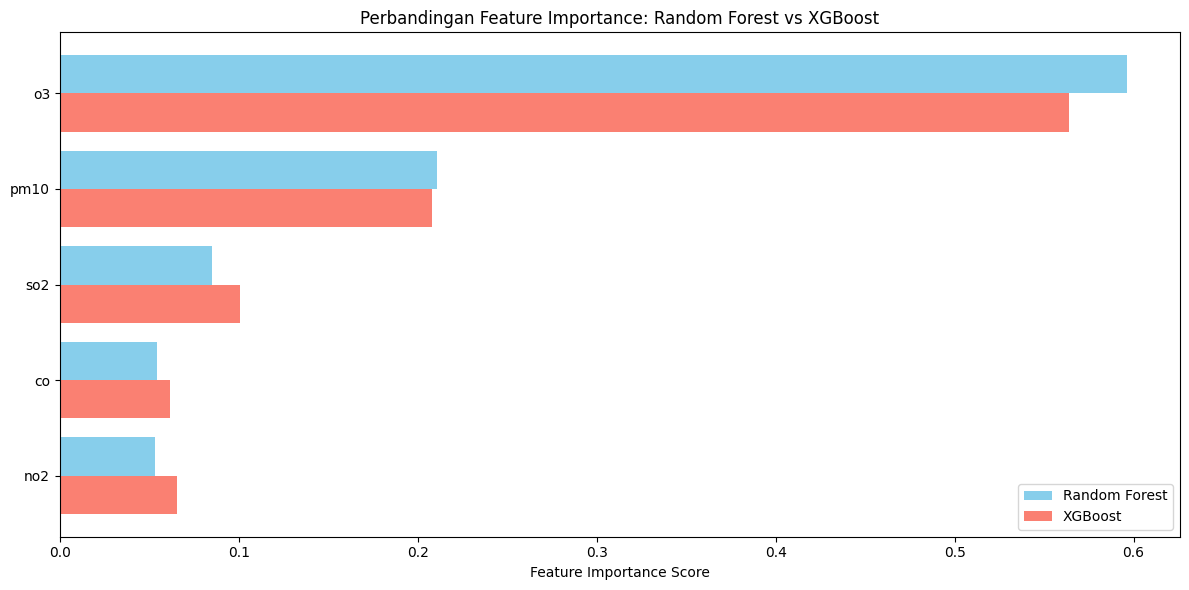

In [37]:
rf_importances = model.feature_importances_
xgb_importances = model2.feature_importances_
feature_names = X.columns

# Urutkan berdasarkan importance dari Random Forest
sorted_indices = np.argsort(rf_importances)[::-1]
sorted_features = np.array(feature_names)[sorted_indices]

# Susun ulang kedua importance berdasarkan urutan fitur tersebut
rf_sorted = rf_importances[sorted_indices]
xgb_sorted = xgb_importances[sorted_indices]

# Plot
bar_width = 0.4
index = np.arange(len(sorted_features))

plt.figure(figsize=(12, 6))
plt.barh(index, rf_sorted, bar_width, label='Random Forest', color='skyblue')
plt.barh(index + bar_width, xgb_sorted, bar_width, label='XGBoost', color='salmon')

plt.yticks(index + bar_width / 2, sorted_features)
plt.xlabel("Feature Importance Score")
plt.title("Perbandingan Feature Importance: Random Forest vs XGBoost")
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()


Berdasarkan grafik tersebut, fitur o3 atau ozon memiliki nilai kontribusi
tertinggi, menunjukkan bahwa ozon merupakan faktor paling signifikan dalam menentukan kualitas udara. Diikuti dengan fitur
pm10 yang juga memberikan kontribusi penting, meskipun lebih
kecil dibandingkan ozon. Kedua jenis partikulat ini sering menjadi indikator
utama dalam prediksi kualitas udara. Sementara itu, fitur so2, no2, dan co
memiliki nilai feature importance yang relatif lebih rendah.